In [1]:
from bs4 import BeautifulSoup
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
#covid=pd.read_csv('C:\\Users\inter\Downloads\COVID-2019 - ECDC (2020).csv')#,encoding='cp949')
#covid=pd.read_csv('C:\\Users\inter\Downloads\owid-covid-data.csv',encoding='cp949')
covid=pd.read_csv('C:\\Users\inter\Downloads\WHO-COVID-19-global-data.csv')


In [3]:
covid.head()
#covid['Country Name'].unique()

,day,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed
0,2020-02-24,AF,Afghanistan,EMRO,0,0,1,1
1,2020-02-25,AF,Afghanistan,EMRO,0,0,0,1
2,2020-02-26,AF,Afghanistan,EMRO,0,0,0,1
3,2020-02-27,AF,Afghanistan,EMRO,0,0,0,1
4,2020-02-28,AF,Afghanistan,EMRO,0,0,0,1


In [106]:
confirmed=pd.read_csv('C:\\Users\\inter\\Downloads\\time_series_covid19_confirmed_global.csv')
deaths=pd.read_csv('C:\\Users\\inter\\Downloads\\time_series_covid19_deaths_global.csv')
recovered=pd.read_csv('C:\\Users\\inter\\Downloads\\time_series_covid19_recovered_global.csv')

confirmed.head()
#deaths.head()
#recovered.head()

,Province/State,Country/Region,Lat,Long,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,933,946,948,949,964,969,981,989,998,1004
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,761,761,761,762,762,762,762,762,763
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,48,48,50,52,52,58,60,61,69,70


In [107]:
confirmed[confirmed['Country/Region']=='Korea, South']
#confirmed['Country/Region'].unique()
print(confirmed.columns)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '2020-01-22',
       '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
       ...
       '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
       '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25'],
      dtype='object', length=129)


### World-wide Covid-19 status
- 존스홉킨스 Covid-19 데이터를 이용한 현대건설 진출국 Covid-19 Data visualization 및 Prediction

In [108]:
confirmed_r=confirmed.transpose()
confirmed_r.head()
confirmed_r1=confirmed_r.drop(['Lat','Long'])
c_r2=confirmed_r1.rename(columns=confirmed_r1.loc['Country/Region'])
c_r2=c_r2.drop(c_r2.index[0:2]) #시계열 자료 이외 삭제

c_r2.head()
c_r2=c_r2.astype(float)
c_r2=c_r2.reset_index()    #일자를 인덱스에서 열로 바꿈
c_r2.dtypes

index                      object
Afghanistan               float64
Albania                   float64
Algeria                   float64
Andorra                   float64
Angola                    float64
Antigua and Barbuda       float64
Argentina                 float64
Armenia                   float64
Australia                 float64
Australia                 float64
Australia                 float64
Australia                 float64
Australia                 float64
Australia                 float64
Australia                 float64
Australia                 float64
Austria                   float64
Azerbaijan                float64
Bahamas                   float64
Bahrain                   float64
Bangladesh                float64
Barbados                  float64
Belarus                   float64
Belgium                   float64
Benin                     float64
Bhutan                    float64
Bolivia                   float64
Bosnia and Herzegovina    float64
Brazil        

In [109]:
c_r2['index']=pd.to_datetime(c_r2['index'])
c_r2.dtypes

index                     datetime64[ns]
Afghanistan                      float64
Albania                          float64
Algeria                          float64
Andorra                          float64
Angola                           float64
Antigua and Barbuda              float64
Argentina                        float64
Armenia                          float64
Australia                        float64
Australia                        float64
Australia                        float64
Australia                        float64
Australia                        float64
Australia                        float64
Australia                        float64
Australia                        float64
Austria                          float64
Azerbaijan                       float64
Bahamas                          float64
Bahrain                          float64
Bangladesh                       float64
Barbados                         float64
Belarus                          float64
Belgium         

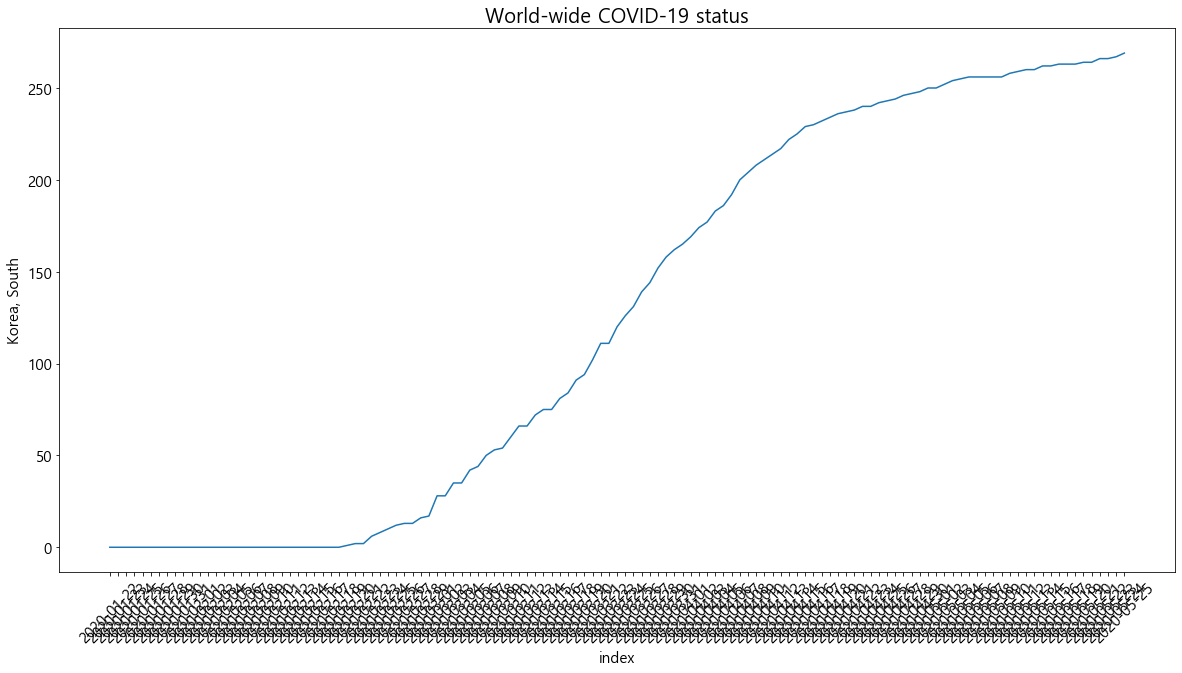

In [110]:
#진출국 Time Series data visualization

plt.figure(figsize=(20,10))
plt.title('World-wide COVID-19 status', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
#plt.xlim('2020-02-20','2020-03-15')
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
#sns.set_context(font_scale=15)
sns.set_color_codes(palette='bright')

sns.lineplot(x='index',y='Korea, South', data=d_r2)#,style='지역'
plt.show()

In [94]:
d_r2['index']

0      1/22/20
1      1/23/20
2      1/24/20
3      1/25/20
4      1/26/20
5      1/27/20
6      1/28/20
7      1/29/20
8      1/30/20
9      1/31/20
10      2/1/20
11      2/2/20
12      2/3/20
13      2/4/20
14      2/5/20
15      2/6/20
16      2/7/20
17      2/8/20
18      2/9/20
19     2/10/20
20     2/11/20
21     2/12/20
22     2/13/20
23     2/14/20
24     2/15/20
25     2/16/20
26     2/17/20
27     2/18/20
28     2/19/20
29     2/20/20
        ...   
95     4/26/20
96     4/27/20
97     4/28/20
98     4/29/20
99     4/30/20
100     5/1/20
101     5/2/20
102     5/3/20
103     5/4/20
104     5/5/20
105     5/6/20
106     5/7/20
107     5/8/20
108     5/9/20
109    5/10/20
110    5/11/20
111    5/12/20
112    5/13/20
113    5/14/20
114    5/15/20
115    5/16/20
116    5/17/20
117    5/18/20
118    5/19/20
119    5/20/20
120    5/21/20
121    5/22/20
122    5/23/20
123    5/24/20
124    5/25/20
Name: index, Length: 125, dtype: object

In [101]:
deaths_r=deaths.transpose()
deaths_r1=deaths_r.drop(['Lat','Long'])
d_r2=deaths_r1.rename(columns=confirmed_r1.loc['Country/Region'])
d_r2=d_r2.drop(d_r2.index[0:2]) #시계열 자료 이외 삭제
d_r2=d_r2.astype(float)
d_r2=d_r2.reset_index()    #일자를 인덱스에서 열로 바꿈
d_r2.dtypes
d_r2.head()


,index,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Malawi,United Kingdom,France,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
0,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
d_r2['Korea, South']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       1.0
       ...  
95     243.0
96     244.0
97     246.0
98     247.0
99     248.0
100    250.0
101    250.0
102    252.0
103    254.0
104    255.0
105    256.0
106    256.0
107    256.0
108    256.0
109    256.0
110    258.0
111    259.0
112    260.0
113    260.0
114    262.0
115    262.0
116    263.0
117    263.0
118    263.0
119    264.0
120    264.0
121    266.0
122    266.0
123    267.0
124    269.0
Name: Korea, South, Length: 125, dtype: float64